In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "2023_cleaned_personal_property_list.csv"  # Update this path accordingly
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
df


,AGENCY_CODE,STATE_AGENCY,PROPERTY_TYPE,PROPERTY_CLASSIFICATION,PROPERTY_NAME,DATE_ACQUIRED_OR_INSTALLED,VALUE_OR_COST,IT_OR_NON-IT
0,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,OWNED,"Desk:Desks And Tables, Wood",2019-01-31,2822.84,NON-IT
1,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,OWNED,Mail Room Area,2010-09-15,4688.00,NON-IT
2,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,OWNED,Receptionist Desk,2010-09-21,2695.74,NON-IT
3,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,OWNED,Software,2011-03-23,20700.00,IT
4,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,OWNED,Port Cabinet W/ Data Cables,2010-08-09,3949.12,IT
...,...,...,...,...,...,...,...,...
65728,981.0,OKLAHOMA MUNICIPAL POWER AUTHORITY,PERSONAL PROPERTY,NaN,Cwip - Redbud Waterline Replacement (2022),2022-01-01,41815.83,NON-IT
65729,981.0,OKLAHOMA MUNICIPAL POWER AUTHORITY,PERSONAL PROPERTY,NaN,Cwip - Turk Rail Project,2022-01-01,494688.32,NON-IT
65730,981.0,OKLAHOMA MUNICIPAL POWER AUTHORITY,PERSONAL PROPERTY,NaN,R&R - Grda 2022,2022-01-01,132268.01,NON-IT
65731,981.0,OKLAHOMA MUNICIPAL POWER AUTHORITY,PERSONAL PROPERTY,NaN,2023 Chevrolet Silverdo 2500Hd,2022-01-01,41604.00,NON-IT


In [3]:
### DESCRIPTIVE ANALYSIS ###
print("Total number of records in the dataset:", len(df))
print("Unique state agencies:", df['STATE_AGENCY'].nunique())
print("Most common property types:")
print(df['PROPERTY_TYPE'].value_counts().head(10))
print("\nProperty classification distribution:")
print(df['PROPERTY_NAME'].value_counts())
print("\nIT vs Non-IT distribution:")
print(df['IT_OR_NON-IT'].value_counts())

Total number of records in the dataset: 65733
Unique state agencies: 83
Most common property types:
PROPERTY_TYPE
PERSONAL PROPERTY    65733
Name: count, dtype: int64

Property classification distribution:
PROPERTY_NAME
Desktop                                      500
Laptop                                       490
Radar, Stalker Dual Dsr 2X, Counting Unit    471
Radar, Stalker Dual Dsr 2X, Antenna          408
Printer                                      320
                                            ... 
Rb2310-10 Ft Heavy Dutty Rear Blade            1
640 R Jd Front End Loader                      1
6130 M John Deere Tractor                      1
Caterpillar Angle Blade                        1
2022 International Bucket Truck                1
Name: count, Length: 47316, dtype: int64

IT vs Non-IT distribution:
IT_OR_NON-IT
NON-IT    33689
IT        32044
Name: count, dtype: int64


In [4]:
### FINANCIAL ANALYSIS ###
# Convert Value or Cost to numeric
df['VALUE_OR_COST'] = pd.to_numeric(df['VALUE_OR_COST'], errors='coerce')

In [5]:
print("\nTotal value of all properties:", df['VALUE_OR_COST'].sum())
print("Average cost of IT properties:", df[df['IT_OR_NON-IT'] == 'IT']['VALUE_OR_COST' ].mean())
print("Average cost of Non-IT properties:", df[df['IT_OR_NON-IT'] == 'NON-IT']['VALUE_OR_COST'].mean())


Total value of all properties: 2106498804.7967439
Average cost of IT properties: 12509.811716479051
Average cost of Non-IT properties: 50753.525254409135


In [6]:
# Most expensive property
most_expensive = df.loc[df['VALUE_OR_COST'].idxmax()]
print("Most expensive property:", most_expensive['PROPERTY_NAME'], "- Value:", most_expensive['VALUE_OR_COST'])

# Agency with the highest total property value
top_agency = df.groupby('STATE_AGENCY')['VALUE_OR_COST'].sum().idxmax()
print("Agency with highest total property value:", top_agency)

Most expensive property: Turk Power Plant - Value: 128465942.3
Agency with highest total property value: OKLAHOMA MUNICIPAL POWER AUTHORITY


In [7]:
### CATEGORICAL ANALYSIS ###
print("\nTop 10 most frequently occurring property names:")
print(df['PROPERTY_NAME'].value_counts().head(10))
print("Agencies with the most diverse range of property types:")
print(df.groupby('STATE_AGENCY')['PROPERTY_TYPE'].nunique().sort_values(ascending=False).head(10))


Top 10 most frequently occurring property names:
PROPERTY_NAME
Desktop                                      500
Laptop                                       490
Radar, Stalker Dual Dsr 2X, Counting Unit    471
Radar, Stalker Dual Dsr 2X, Antenna          408
Printer                                      320
Radio, Apx 6500, Geo/Gps                     294
Video, Dv-1E Overhead                        267
Computer                                     259
Projector                                    198
Video, 4Re, Dvr                              161
Name: count, dtype: int64
Agencies with the most diverse range of property types:
STATE_AGENCY
ABLE COMMISSION                              1
REGENTS FOR HIGHER EDUCATION                 1
PANHANDLE STATE UNIVERSITY                   1
OMES                                         1
OKLAHOMA TURNPIKE AUTHORITY                  1
OKLAHOMA STUDENT LOAN AUTHORITY              1
OKLAHOMA MUNICIPAL POWER AUTHORITY           1
OKLAHOMA MEDICAL MARIJ

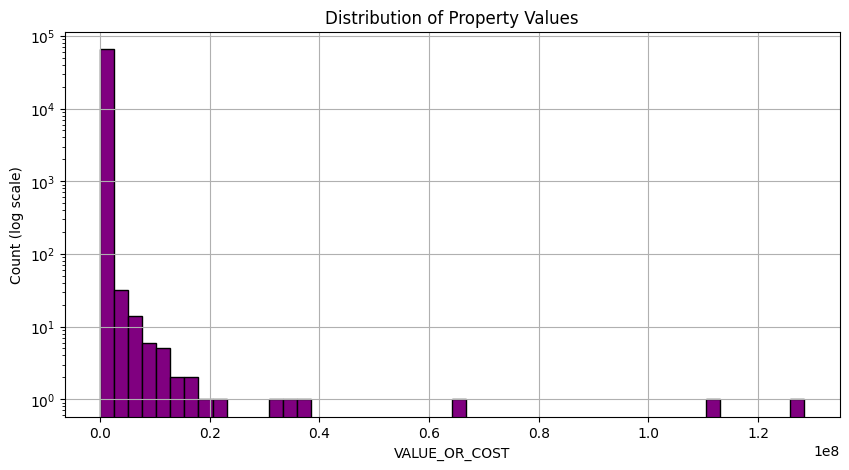

In [8]:
### DATA VISUALIZATION ###
# Histogram of property values
plt.figure(figsize=(10,5))
df['VALUE_OR_COST'].dropna().hist(bins=50, color='purple', edgecolor='black')
plt.yscale('log')
plt.title("Distribution of Property Values")
plt.xlabel("VALUE_OR_COST")
plt.ylabel("Count (log scale)")
plt.show()

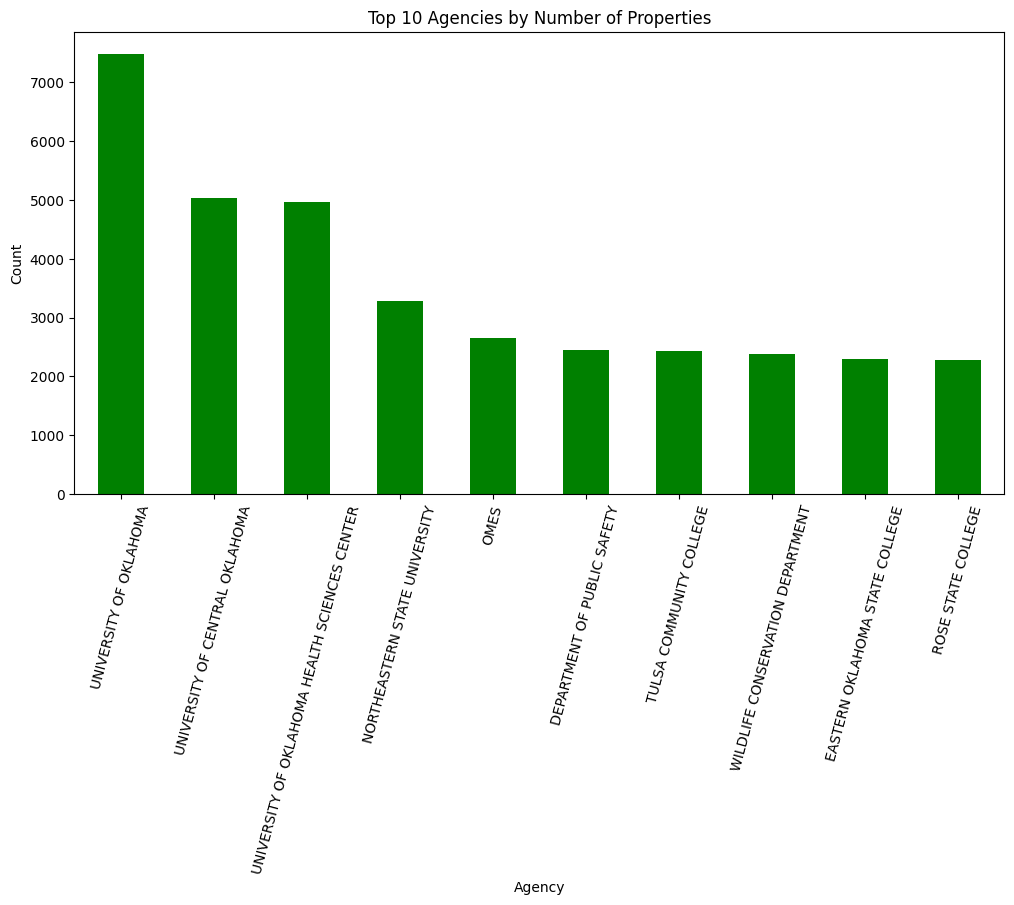

In [9]:
# Properties per agency (top 10)
plt.figure(figsize=(12,6))
df['STATE_AGENCY'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Agencies by Number of Properties")
plt.xlabel("Agency")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

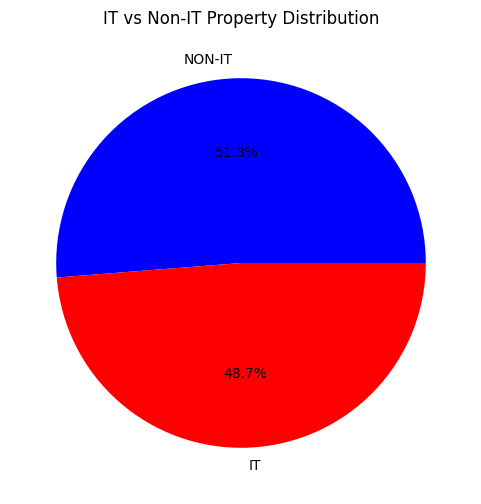

In [10]:
# IT vs Non-IT properties
plt.figure(figsize=(6,6))
df['IT_OR_NON-IT'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("IT vs Non-IT Property Distribution")
plt.ylabel("")
plt.show()

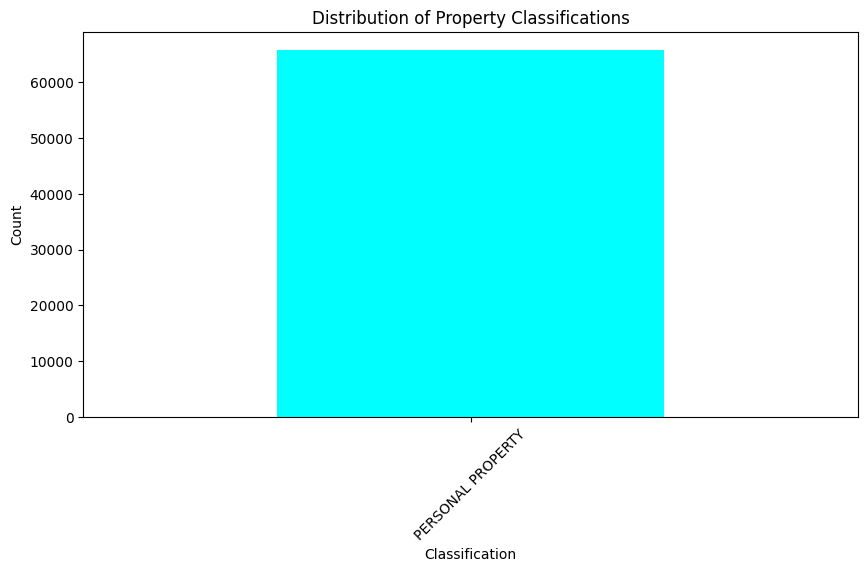

In [11]:
# Property Classification Distribution
plt.figure(figsize=(10,5))
df['PROPERTY_TYPE'].value_counts().plot(kind='bar', color='cyan')
plt.title("Distribution of Property Classifications")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

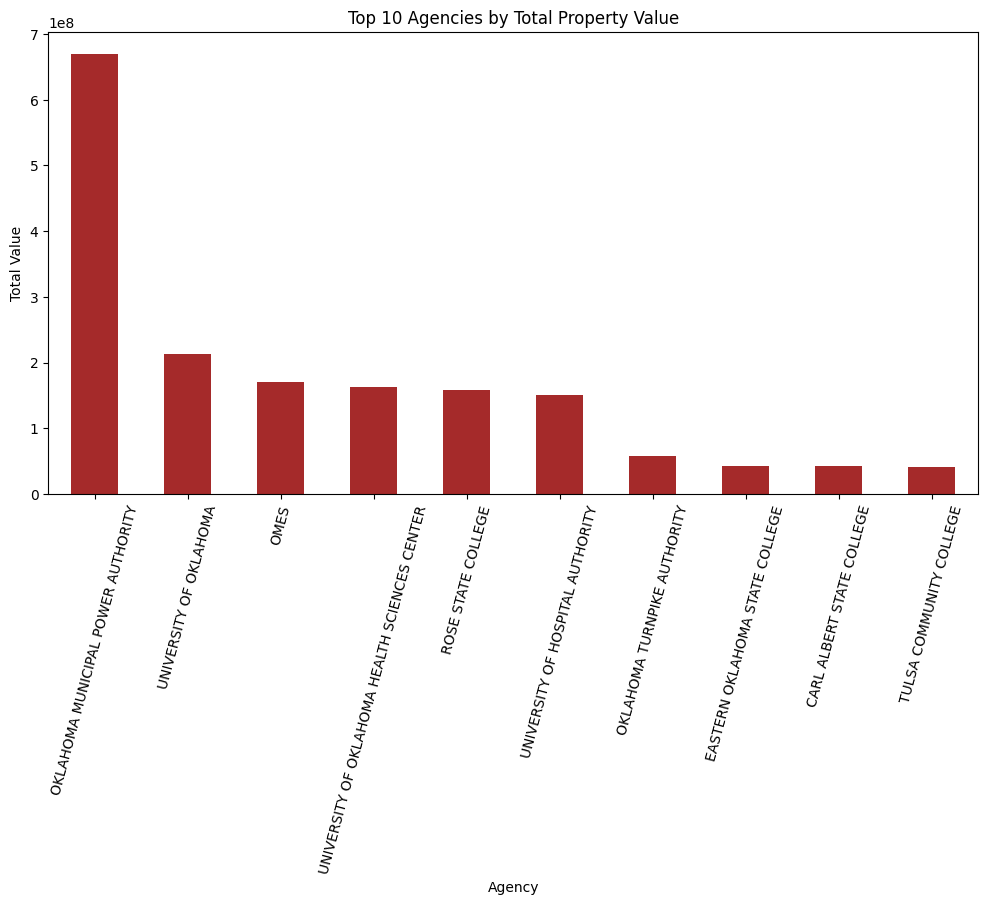

In [12]:
# Top agencies by total property value
plt.figure(figsize=(12,6))
df.groupby('STATE_AGENCY')['VALUE_OR_COST'].sum().nlargest(10).plot(kind='bar', color='brown')
plt.title("Top 10 Agencies by Total Property Value")
plt.xlabel("Agency")
plt.ylabel("Total Value")
plt.xticks(rotation=75)
plt.show()

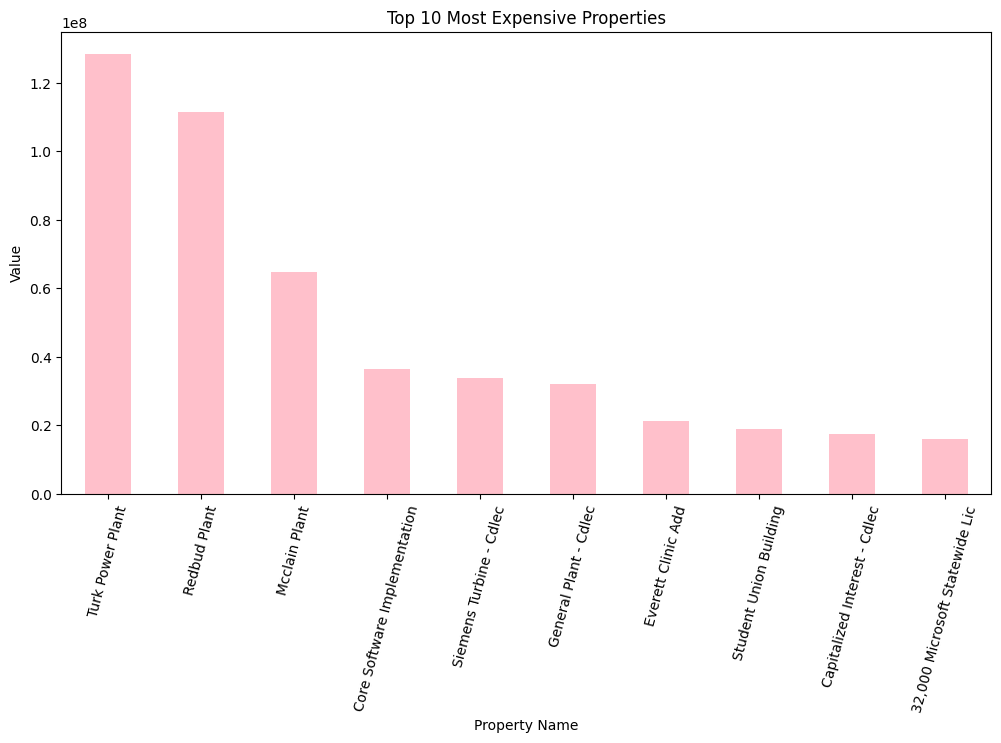

In [13]:
# Top 10 most expensive properties
plt.figure(figsize=(12,6))
df.nlargest(10, 'VALUE_OR_COST').set_index('PROPERTY_NAME')['VALUE_OR_COST'].plot(kind='bar', color='pink')
plt.title("Top 10 Most Expensive Properties")
plt.xlabel("Property Name")
plt.ylabel("Value")
plt.xticks(rotation=75)
plt.show()

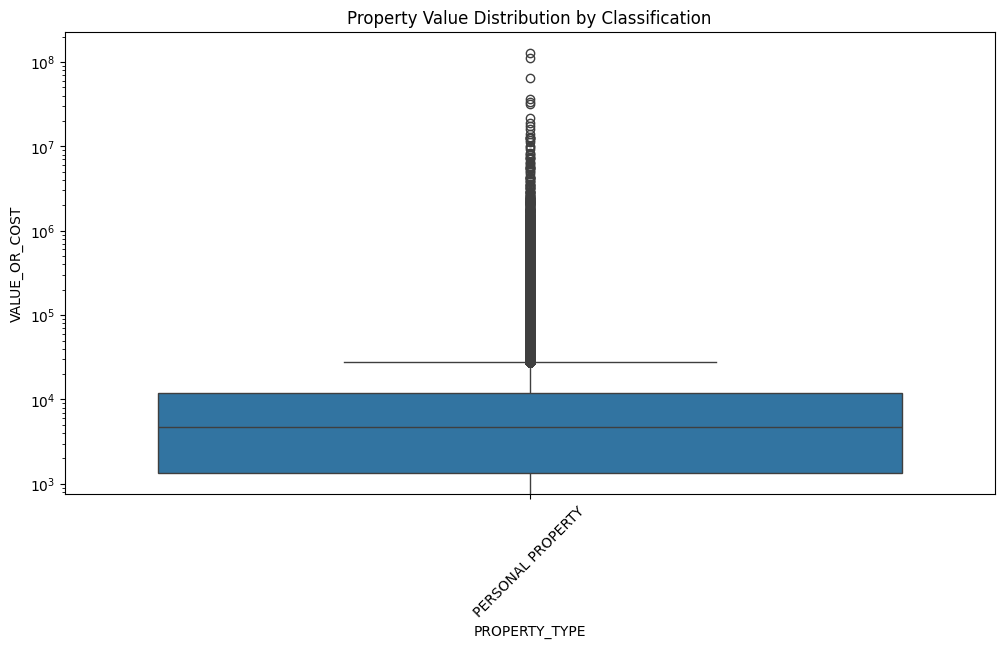

In [14]:
# Box plot of property value by classification
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='PROPERTY_TYPE', y='VALUE_OR_COST')
plt.yscale("log")
plt.title("Property Value Distribution by Classification")
plt.xticks(rotation=45)
plt.show()

In [15]:
print("\nAnalysis completed.")


Analysis completed.
